# Lab 2 - Exploratory Data Analysis
## Hudson Arney

### Introduction: 
In this lab I will attempt to create some plots that will compare different variable types with both the type of housing and price of housing using the Sacramento dataset from the previous lab. From these plots I hope to analyze certain trends in the data to come to specific conclusions. I hope to learn quite a bit from this data and get more practice with pandas and matplotlib

### Dataset Description:
The given data set is of addresses, and house specifications from Sacramento California. Each house has info on the number of types of rooms, square footage, price, sale date, exact location, etc. This can be better used to understand the housing market in Sacramento, and may be applied elsewhere.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pyarrow as pa

### Loading the Data

In [2]:
file_path = "C:\\Users\\arneyh\\Data Science Labs\\Lab 1\\cleaned_data.csv"
df = pd.read_csv(file_path)

In [3]:
categorical_columns = ['city', 'state', 'zip', 'beds', 'baths', 'type', 'street_type']

df[categorical_columns] = df[categorical_columns].astype('category')

In [4]:
df.head()

,Unnamed: 0,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude,street_type
0,0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879,ST
1,1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028,CT
2,2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839,ST
3,3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146,WAY
4,4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768,DR


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984 entries, 0 to 983
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Unnamed: 0   984 non-null    int64   
 1   street       984 non-null    object  
 2   city         984 non-null    category
 3   zip          984 non-null    category
 4   state        984 non-null    category
 5   beds         984 non-null    category
 6   baths        984 non-null    category
 7   sq__ft       984 non-null    int64   
 8   type         984 non-null    category
 9   sale_date    984 non-null    object  
 10  price        984 non-null    int64   
 11  latitude     984 non-null    float64 
 12  longitude    984 non-null    float64 
 13  street_type  984 non-null    category
dtypes: category(7), float64(2), int64(3), object(2)
memory usage: 66.1+ KB


# Part I: Regression on Price

# a. 

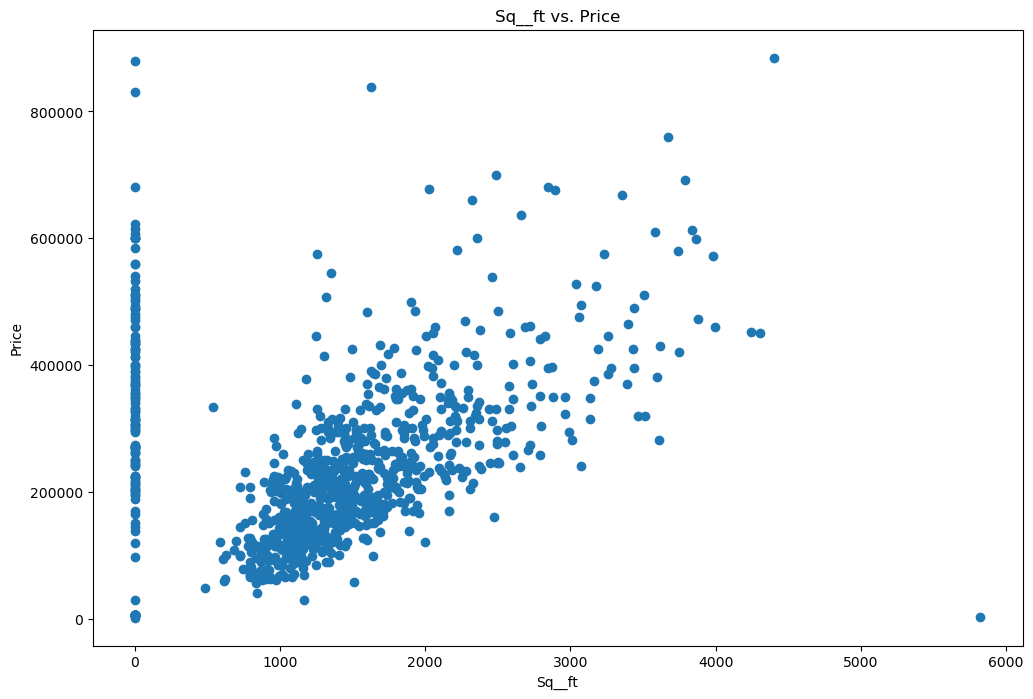

In [6]:
plt.figure(figsize=(12, 8))
plt.scatter(df['sq__ft'], df['price'])
plt.title('Sq__ft vs. Price')
plt.xlabel('Sq__ft')
plt.ylabel('Price')
plt.show()

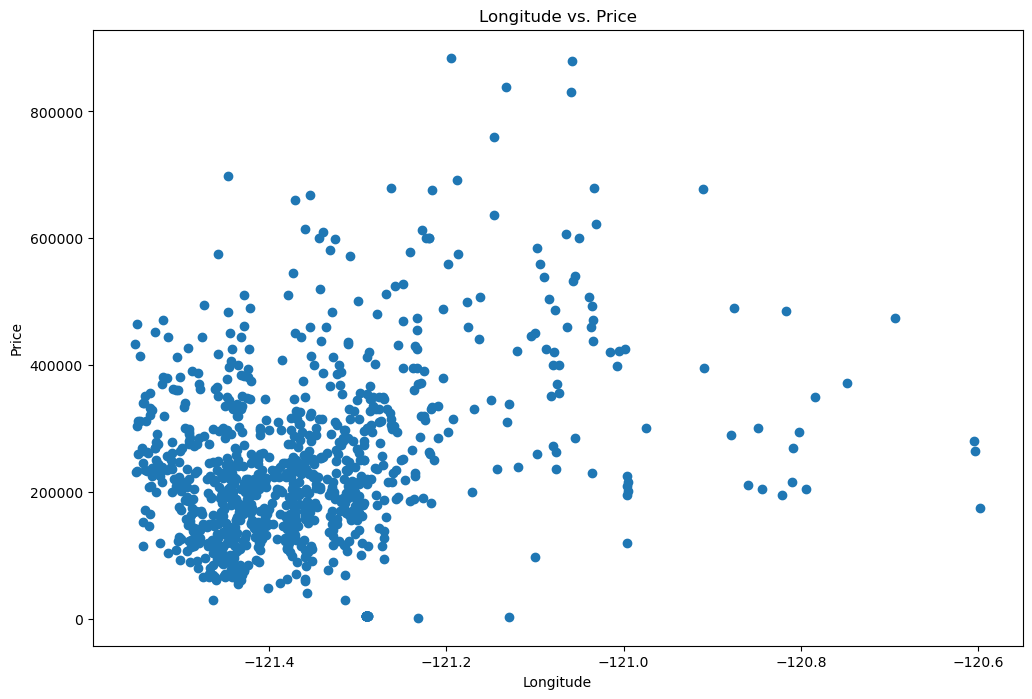

In [7]:
plt.figure(figsize=(12, 8))
plt.scatter(df['longitude'], df['price'])
plt.title('Longitude vs. Price')
plt.xlabel('Longitude')
plt.ylabel('Price')
plt.show()

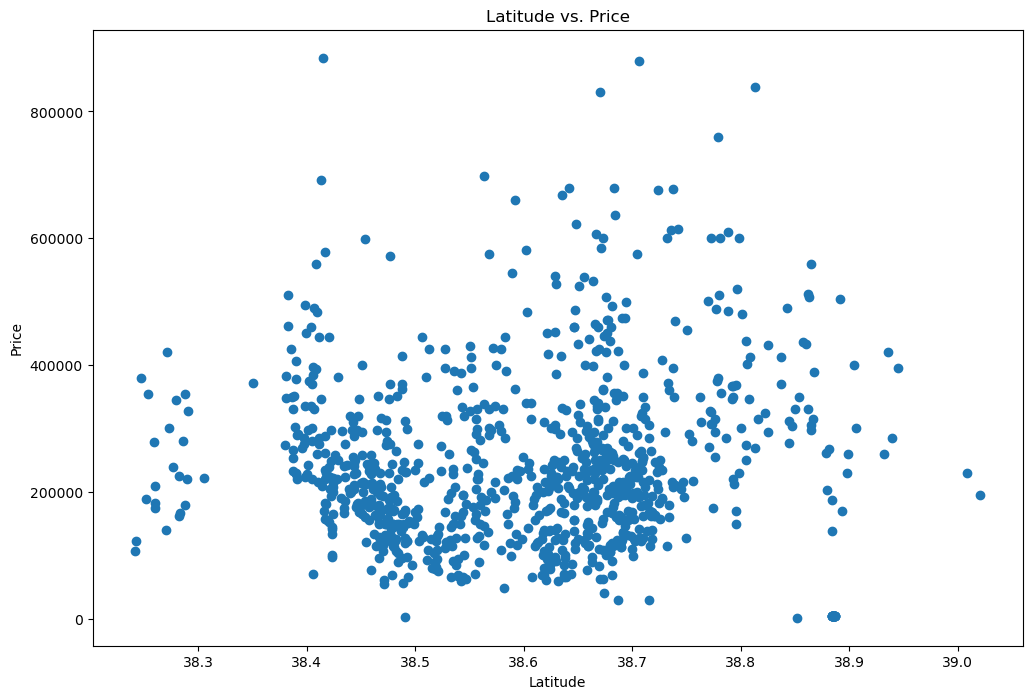

In [8]:
plt.figure(figsize=(12, 8))
plt.scatter(df['latitude'], df['price'])
plt.title('Latitude vs. Price')
plt.xlabel('Latitude')
plt.ylabel('Price')
plt.show()

# b.
A predictive continuous independent variable (feature variable) will correlate with the output variable (target variable). For each continuous independent variable (feature variable), explain if you think the variable will be predictive or not. You could describe if one variable seems to be more predictive than the other based on the strength of the observed relationship.

### Sq__ft vs. Price: 
I hypothesize this will be the best indictor or preidcotr of a trend out of thee continuous variables. I believe it will be the best because I would predict that the more square footage a house has, the more likely it is more expensive. 

Square footage appears to have the most predictive power out of these options. Aside from the obvious 0 square footage lots, there is a general trend that as square footage increase, price increases. This makes the most logical sense as well as you would imagine a bigger house would cost more.

### Longitude vs. Price:
I hypothesize this doesn't give much of a prediction for the data unless there is a specfic part of Sacramento (Longitudely) where either very expensive or cheap housing is concentrated.

Upon analysis there is not much predictive power using Longitude and Price. The plot more so shows that most houses were bought around the -121 longitude degree mark, but not necessarily what longitude had the most expensive or cheapest houses. There is no trend applicable.

### Latitude vs. Price: 
I hypothesize this doesn't give much of a prediction for the data unless there is a specfic part of Sacramento (Latitudely) where either very expensive or cheap housing is concentrated.

Upon analysis there is not much predictive power for Latitude and Price. The plot simply shows a variety of dots within the given range. There is no trend applicable.

# c.

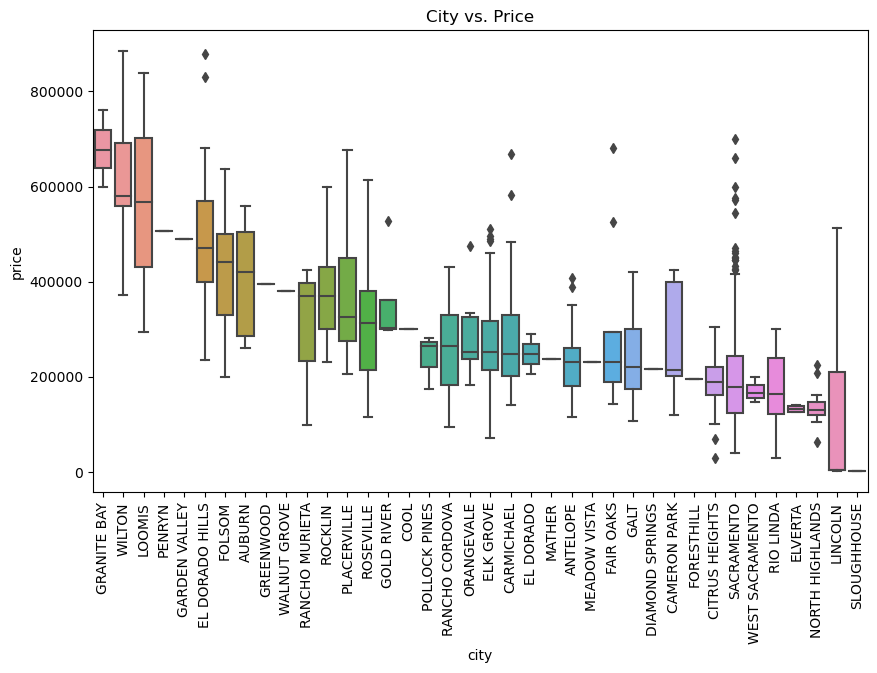

In [9]:
plt.figure(figsize=(10, 6))
median_prices_by_city = df.groupby('city')['price'].median().sort_values(ascending=False)
sns.boxplot(x='city', y='price', data=df, order=median_prices_by_city.index)
plt.xticks(rotation=90)
plt.title('City vs. Price')
plt.show()

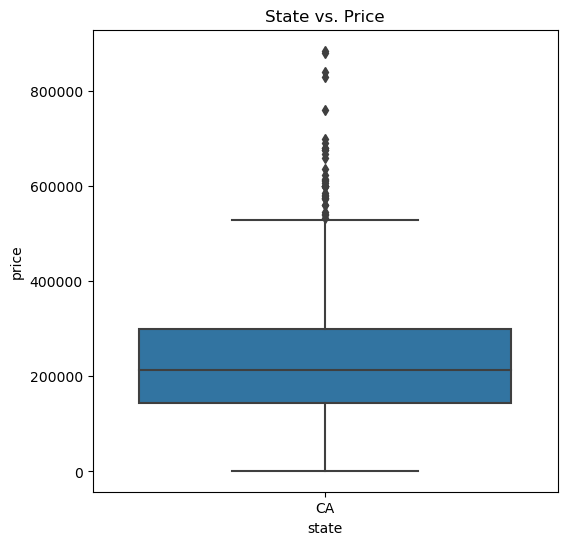

In [10]:
plt.figure(figsize=(6, 6))
sns.boxplot(x='state', y='price', data=df)
plt.title('State vs. Price')
plt.show()

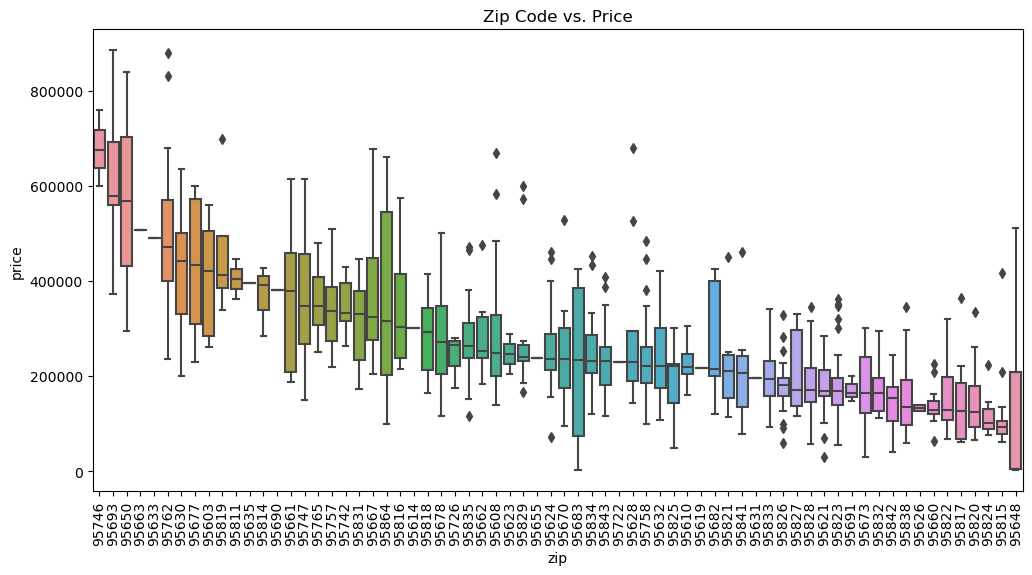

In [11]:
plt.figure(figsize=(12, 6))
median_prices_by_zip = df.groupby('zip')['price'].median().sort_values(ascending=False) 
# Instead of numerically in order, set to the order in median price. 
# I thought this would be an easier way to see what zip codes actually cost.
sns.boxplot(x='zip', y='price', data=df, order=median_prices_by_zip.index)
plt.xticks(rotation=90)
plt.title('Zip Code vs. Price')
plt.show()

Out of curiosity I looked up the highest zip code area (Granite Bay) and it happens to be on/near a lake and is pretty much the only one in Sacramento. That would make sense why it costs more!

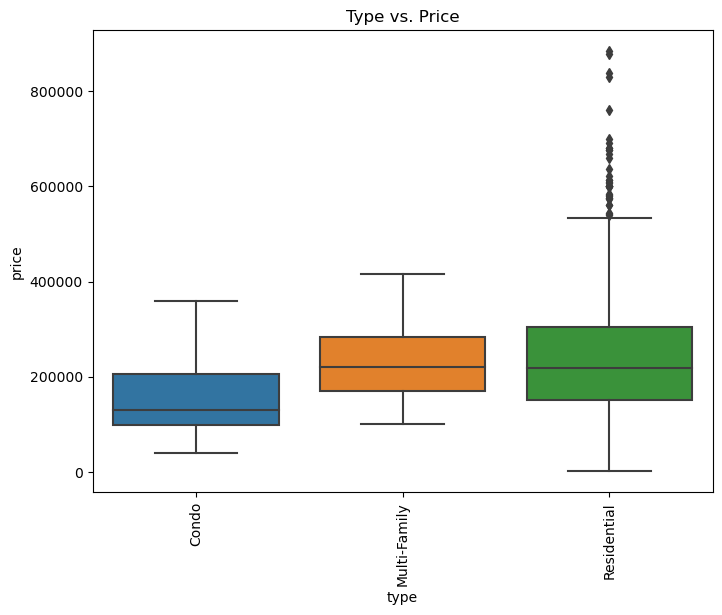

In [12]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='type', y='price', data=df)
plt.xticks(rotation=90)
plt.title('Type vs. Price')
plt.show()

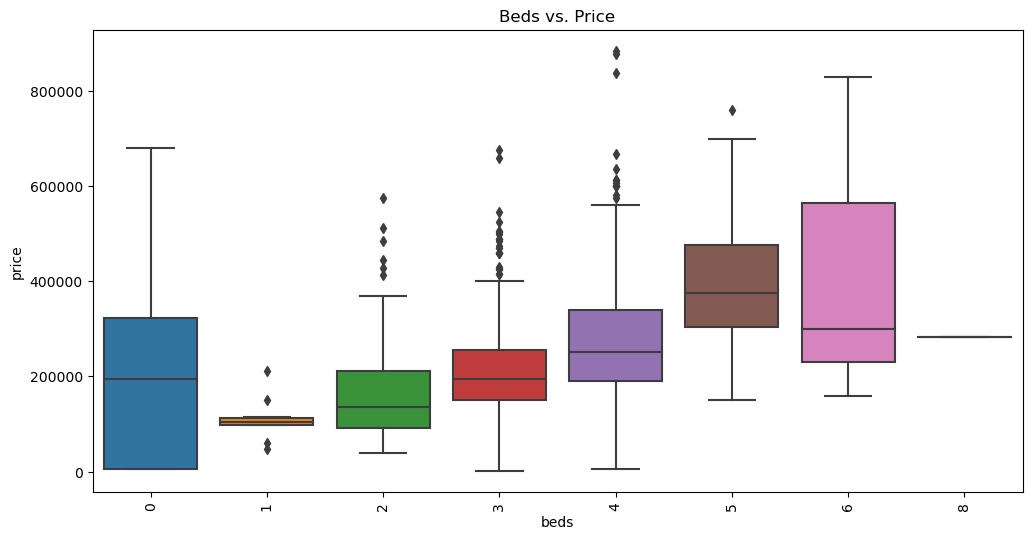

In [13]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='beds', y='price', data=df)
plt.xticks(rotation=90)
plt.title('Beds vs. Price')
plt.show()

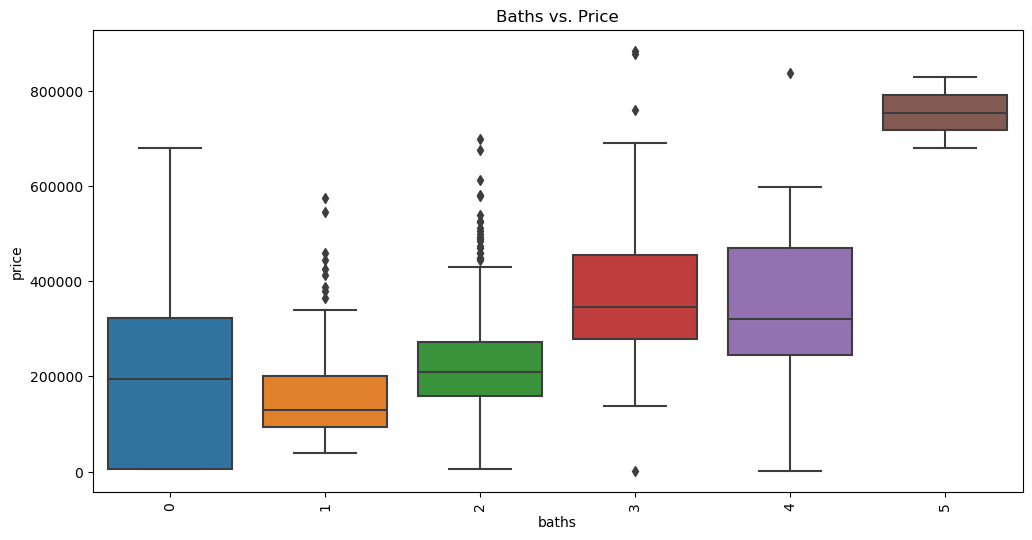

In [14]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='baths', y='price', data=df)
plt.xticks(rotation=90)
plt.title('Baths vs. Price')
plt.show()

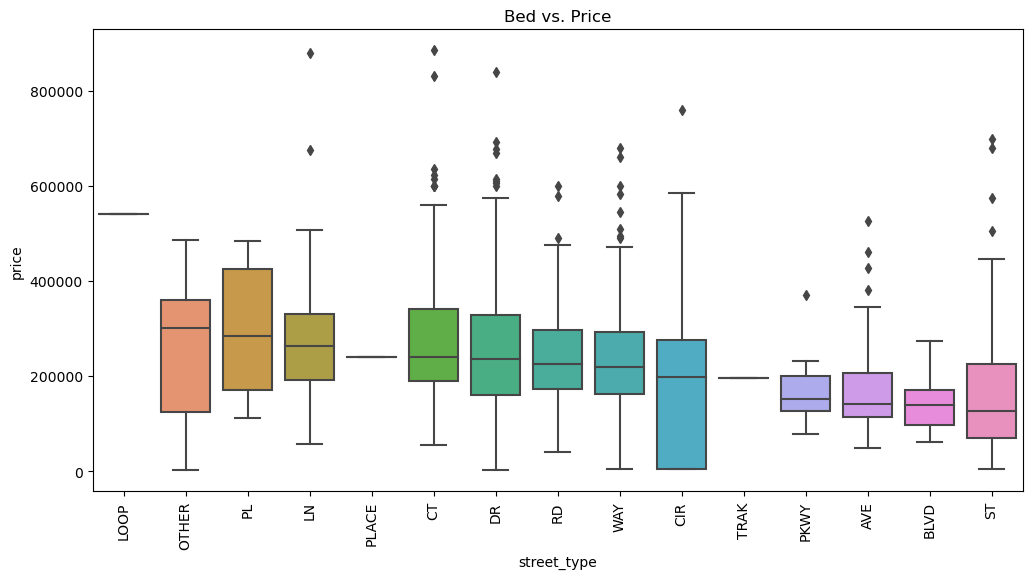

In [15]:
plt.figure(figsize=(12, 6))
median_prices_by_street = df.groupby('street_type')['price'].median().sort_values(ascending=False) 
sns.boxplot(x='street_type', y='price', data=df, order=median_prices_by_street.index)
plt.xticks(rotation=90)
plt.title('Bed vs. Price')
plt.show()

# d.

A predictive categorical independent variable will have different distributions of the output variable for each categorical value. For each categorical independent variable (feature variable), explain if you think the variable will be predictive or not. Describe if one variable seems to be more predictive than the other based on the strength of the observed relationship.

### City vs. Price: 
I hypothesize this will be the best indictor or predictor of a trend out of thee continuous variables. I believe it will be the best because I would predict that the more square footage a house has, the more likely it is more expensive. 

Upon analysis and similar to the zip-code analysis I believe this plot shows an interesting trend. Since I'm not familiar with Sacramento and its neighboring cities I can't say for certain what the trends are but with more digging you could find some. 

### State vs. Price:
I hypothesize the state data will not be a good predictor of price from the categorical variables. This is mostly due to the simple fact that all of the data comes from Sacramento, a city in the state of California (very diverse plot).

Upon analysis there is not much predictive power using this plot. It only has one plot since all the data is from California. Nothing useful here except for confirming that all the data from this dataset is from California.

### Zip-Code vs. Price: 
I hypothesize zip-codes will be a good predictor of price from the categorical variables for similar reasons to the city data. I would imagine zip codes that are located in areas that are more sought after, will be more expensive and vice versa. 

Upon analysis I believe there is some predictive power to be found here as there are certainly some places more expensive than others. I would have to actually look on a map to see what the trend would actually be from this, I would assume places closer to water, suburbs with more land, etc. would be more expensive.

### Beds vs. Price:
I hypothesize beds will be the best predictor of price from the categorical variables.I would imagine that the more beds a house has, would generally mean the more expensive it becomes (found this out with apartment searching this year).

Upon analysis I was mostly correct with this statement. For the same reason I explain with the baths, every house should have at least one bedroom so I believe to see a trend in the data if we are looking at houses in particular you can ignore the 0 bedroom places (however if you are looking strictly at property regardless of homes then this shouldn't be ignored). From the plot it shows a pretty steady increase in price as the bedrooms increase apart from 6 and 7 bedroom houses but I believe that is due to the higher variance in that data (likely a lot less homes with that many rooms). 

### Baths vs. Price:
I hypothesize baths will be a good predictor of price from the categorical variables similar to how beds should be. I believe it will be the best because I would predict that the more bathrooms a house has, the more likely it is more expensive. 

Upon analysis the trend is mostly true. You can tell the empty lots with 0 bathrooms take up a lot of the data in this segment but I believe most of this can be ignored as every house should have at least one bathroom. When looking at house with 1-5 it steadly increases in price and is probably the most straightforward looking trend in these plots. 

### Street Type vs. Price:
I hypothesize street type will not be a good predictor of price as a categorical variable. I don't believe houses would show a price trend based on whther it is an "Avenue" or "Boulvard" for example. 

Upon analysis I was mostly correct here where they were all relatively similar and don't show a trend or favoritism based on the street type. There are also a quite a few outliers in this group. 

# Part II: Classification on Property Type

# a.

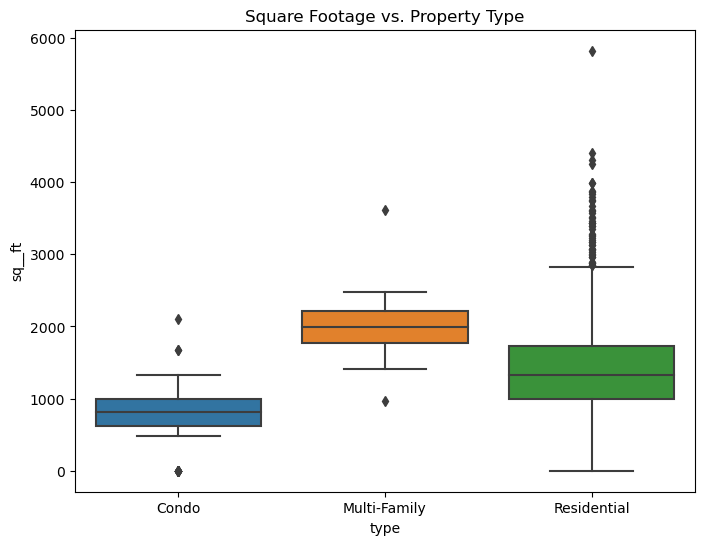

In [16]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='type', y='sq__ft', data=df)
plt.title('Square Footage vs. Property Type')
plt.show()

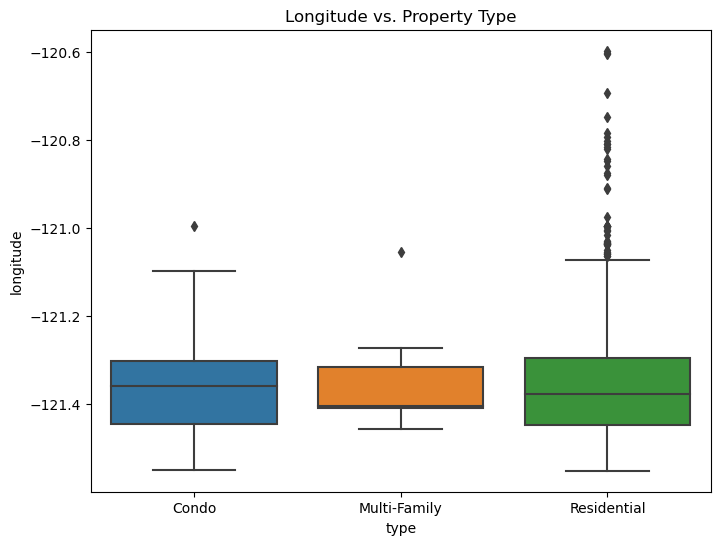

In [17]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='type', y='longitude', data=df)
plt.title('Longitude vs. Property Type')
plt.show()

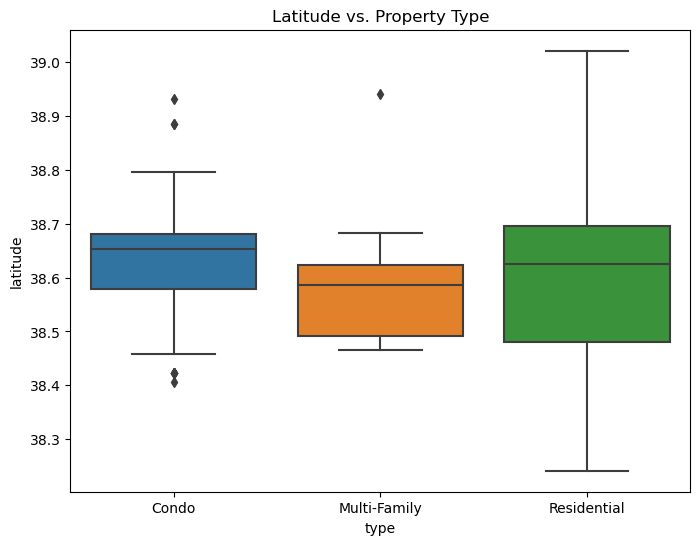

In [18]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='type', y='latitude', data=df)
plt.title('Latitude vs. Property Type')
plt.show()

# b.
A predictive continuous independent (feature) variable will have different 
distributions for each categorical output value. Describe if each continuous feature 
variable is predictive or not.

### Sq__ft vs. Type: 
Based on the three types of homes in the dataset (Multi-family, Condo, and Residental) I would assume the largest would be Multi-family as that seems like it needs to accomodate most people, then Residental (I would assume is like the average house) and then Condo (more meant for smaller families or couples). Thus, I hypothesize the plot to show that the square footage will be in that order.

Upon analysis I was correct when looking at the median house square footage this is what is shows. Residental has quite a few outliers. I would say that using square footage as a predictor for house type is a fair assessment but the trend isn't super great as they are all within each others bounds a bit and there are only three types to choose from.

### Longitude vs. Type:
I hypothesize this doesn't give much of a prediction for the data unless there is a specfic part of Sacramento (Longitudely) where only certain housing is allowed (maybe only condos, no houses, at a specific longitude in the city).

Upon analysis there is not much predictive power using Longitude and House Type. All box plots are almost indistinguishable from each other apart from the fact that residental has quite a few outliers up north apparently.

### Latitude vs. Type: 
I hypothesize this doesn't give much of a prediction for the data for the same reason as longidue above. It doens't really make sense for a specific house type to match with a specfic latitude.

Upon analysis there is not much predictive power for Latitude and Type. There is potentially a small trend for non-condo homes to be more west than condos (condos being more east) but this is kind of reaching. I see no applicable trend from this plot.

# c.

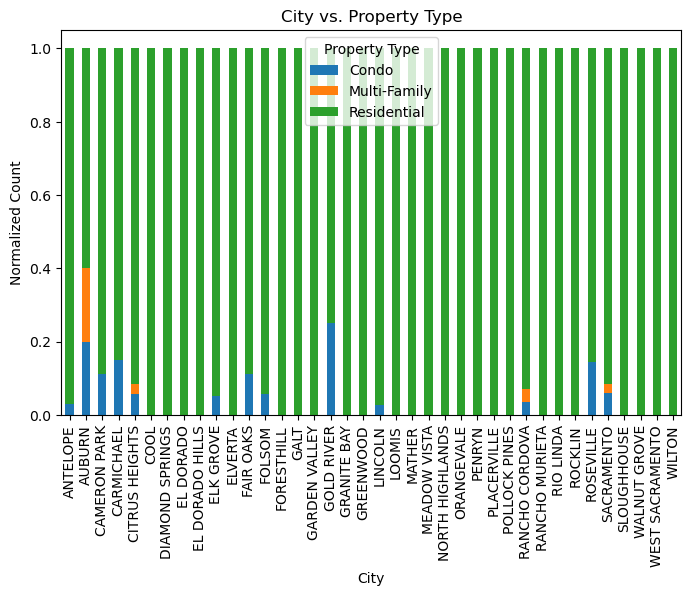

In [19]:
cross_tab = pd.crosstab(index=df['city'], columns=df['type'], normalize='index')
cross_tab.plot(kind='bar', stacked=True, figsize=(8, 5))
plt.title('City vs. Property Type')
plt.xlabel('City')
plt.ylabel('Normalized Count')
plt.xticks(rotation=90)
plt.legend(title='Property Type')
plt.show()

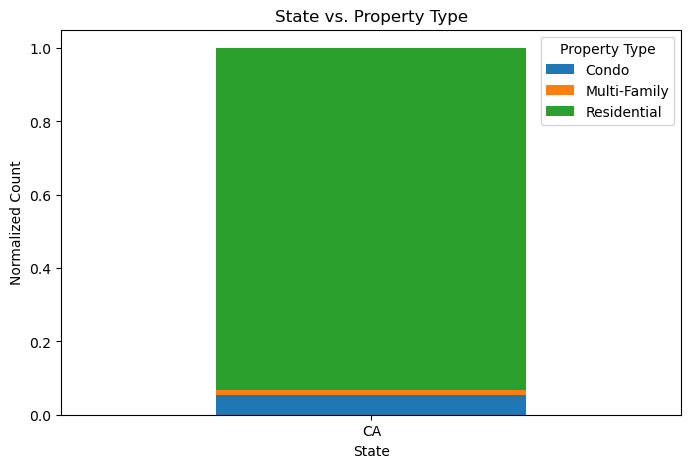

In [20]:
cross_tab = pd.crosstab(index=df['state'], columns=df['type'], normalize='index')
cross_tab.plot(kind='bar', stacked=True, figsize=(8, 5))
plt.title('State vs. Property Type')
plt.xlabel('State')
plt.ylabel('Normalized Count')
plt.xticks(rotation=0)
plt.legend(title='Property Type')
plt.show()

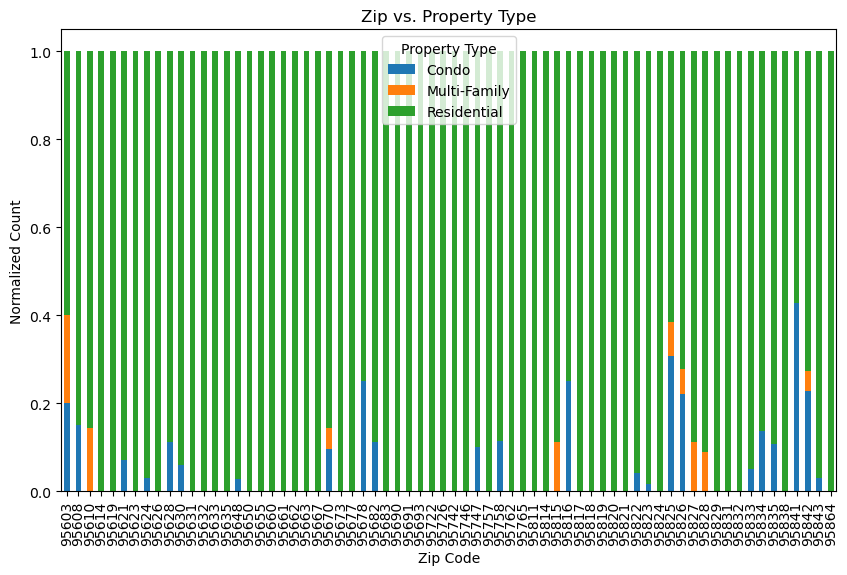

In [21]:
cross_tab = pd.crosstab(index=df['zip'], columns=df['type'], normalize='index')
cross_tab.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Zip vs. Property Type')
plt.xlabel('Zip Code')
plt.ylabel('Normalized Count')
plt.xticks(rotation=90)
plt.legend(title='Property Type')
plt.show()

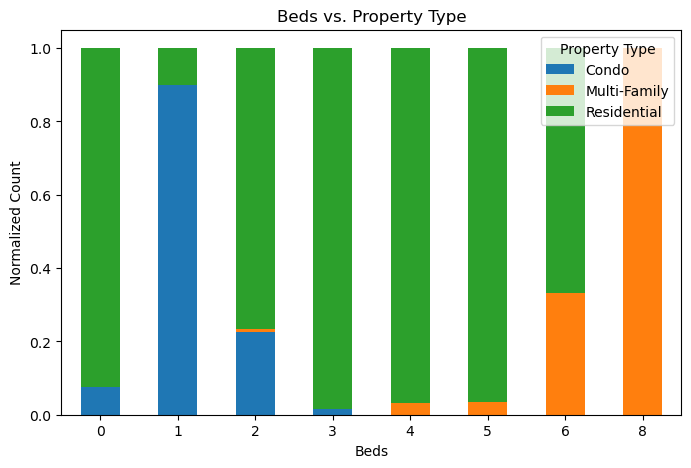

In [22]:
cross_tab = pd.crosstab(index=df['beds'], columns=df['type'], normalize='index')
cross_tab.plot(kind='bar', stacked=True, figsize=(8, 5))
plt.title('Beds vs. Property Type')
plt.xlabel('Beds')
plt.ylabel('Normalized Count')
plt.xticks(rotation=0)
plt.legend(title='Property Type')
plt.show()

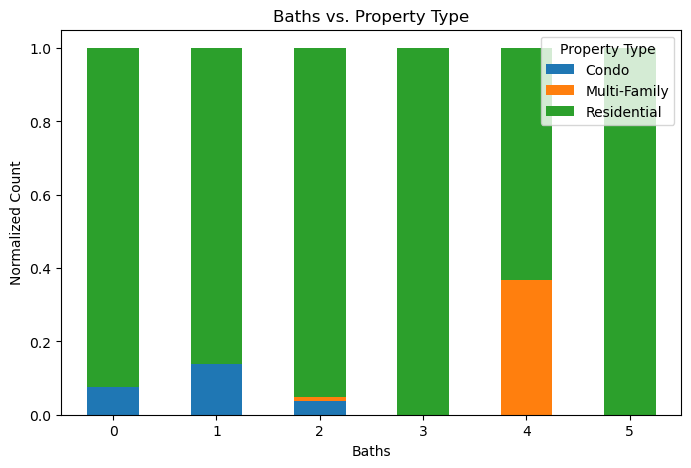

In [23]:
cross_tab = pd.crosstab(index=df['baths'], columns=df['type'], normalize='index')
cross_tab.plot(kind='bar', stacked=True, figsize=(8, 5))
plt.title('Baths vs. Property Type')
plt.xlabel('Baths')
plt.ylabel('Normalized Count')
plt.xticks(rotation=0)
plt.legend(title='Property Type')
plt.show()

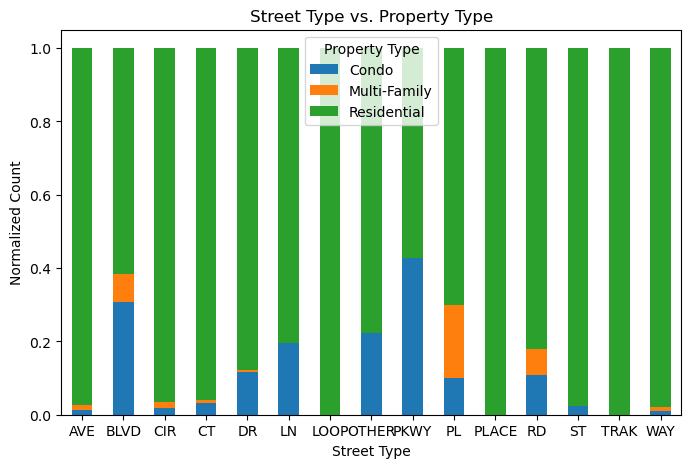

In [24]:
cross_tab = pd.crosstab(index=df['street_type'], columns=df['type'], normalize='index')
cross_tab.plot(kind='bar', stacked=True, figsize=(8, 5))
plt.title('Street Type vs. Property Type')
plt.xlabel('Street Type')
plt.ylabel('Normalized Count')
plt.xticks(rotation=0)
plt.legend(title='Property Type')
plt.show()

# d.

### City vs. Type: 
I hypothesize this will be a good predictor out of these continuous variables. I believe certain cities will have predominately different types of homes and the data and graphs will reflect this. 

Upon analysis and similar to the zip-code analysis I believe this plot shows a trend as to what cities have certain house types. I think it is clear to see that Residental is the most popular house type (not sure if that is because that is just what most of the data was collected was on these types, or if that's just the case). Regardless some cities have high amounts of the other types of homes like Auburn for example having the most multi-family and Gold River the most condos percentage wise. Similar to Zip-code I think this is an ok predictor with potential (if you look at where the cities actually are and what makes them up).

### State vs. Type:
I hypothesize the state data will not be a good predictor of type from the categorical variables. This is because all of the data comes from Sacramento, California, a single state.

Upon analysis there is not much predictive power using this plot. It only has one plot since all the data is from California. Nothing useful here except for confirming that all the data from this dataset is from California.

### Zip-Code vs. Type: 
I hypothesize zip-codes will be a good predictor of price from the categorical variables for similar reasons to the city data. I would imagine zip codes that are larger plots of land (maybe comparing sq__ft, zip-code, and type would be good) would ultimately have large multi-family homes, and places closer to the city could have smaller condos. 

Upon analysis I can't say the plot is super useful to look at. There are quite a few zip codes and since I'm not familiar with them to know hwere they are actually located I can't give a specific trend. However, with digging there is a possibliity to find one. I would say this is an ok predictor with potential.

### Beds vs. Type:
I hypothesize beds will be the best predictor of type from the categorical variables. I would imagine that the more beds a house has, would generally mean a bigger house (so a Multi-family) and vice versa.

Upon analysis I was correct with this statement. The plot actually clearly shows smaller bedroom places (1-2) being mostly condos. Then as beds rise (3-6) it goes up to residnetal, and as they rise all the way to the 7-8 mark it is almost exclusively Multi-family homes. Apart from the 0 bedroom lots (mostly considered residental but some condo) this is a great plot trend and predictor.

### Baths vs. Type:
I hypothesize baths will be a good predictor of property type from the categorical variables similar to how beds should be. I believe it will be the good because I would predict that the baths a house has, the more likely it is more expensive. 

Upon analysis the trend is mostly true. Again I feel the 0 bath/bed lots are something that should be look at on their own and not with the rest of the "real" houses necessarily because they aren't the same objects. Regardless Residental still take over the vast majority of all data but condos make up a good portion and stay in the 1-2 range. Then it is almost exclusively Residental at 3. Multi-family comes in a lot at 4. The hiccup from this comes with 5 bedroom places being only Residental but htis may be due to only a few samples of houses with this many bathrooms. I believe there is a decent trend here for a predictor (more baths go in order Condo->Residental->Multi-family).

### Street Type vs. Property Type:
I hypothesize street type will not be a good predictor of price as a categorical variable. I don't believe houses would show a type trend based on what kind of street it is located. 

Upon analysis I was mostly correct here where there are a few types that have a decent percentage of condos at them but other than that the data is pretty mixed and doesn't show any great trends.

# Part III: Compare Predictive Variables

# a. How many variables are predictive for both problems?
I think that Square footage, Beds, and Baths were the best predictors for both the problems to gather simply from the plots shown. They all proved that with an increase in their type, the price or type of house would change. These are all quantifiable data points and as such are able to have decent trends applicable in this case. With many of the other points they are more "random" and aren't as likely to show a trend in both a common sense way, but is proven with the plots made here. As when you change the street type of a house, or look at the exact coordinates of a house there isn't a strong correlation to anything else shown. (Longitude and Latitude also were quite limited since all data came from Sacramento area).

# b. Explain why you think each variable would be predictive of both or only one problem.


I think that zip codes and cities only really worked for trends when comparing with price. I think that you can see this when comparing types with price and how there wasn't a great trend there. Again these problems require a deeper understanding of the data from where it is actually coming from in which someone like me would not be able to answer right away. 

I think that beds, baths, and square footage work for them all because as I stated in part a, they are simple concepts that make sense. As the numbers of these increase the price should increase. Or as the nubmers of these increase the house should get bigger which changes the house type. 

I think that street type is bad for both. I don't think there is any trend to be found of any kind using street type not just for these two examples but almost anything (ok maybe something super niche).

I think that state is also a bad preditive for both as there is no disimilar data to compare it to. Its such a broad area it falls into one category which isn't helpful for analyzing trends.

# Conclusion
In conclusion in this lab I was able to create quite a few plots and enhance my coding abilities with matplotlib which is always greatly appreciate. I learned how to analysis data quite a bit and look for trends from it using plots. I extended on the differences in variable types and how they can affect certain trends. I liked being able to make hypothesizes and testing them using the data. Overall, I have enjoyed these first two labs and think data science is something I really would consider with my future CS degree.